### PART 2 ASSESMENT
<br>
#### Import related library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

<br> 
#### Import csv file (dataset that has been preprocessed in SQL and Excel) 

p/s: data consists of 214 rows and 8 columns after cleaning and selecting process

In [2]:
df = pd.read_csv('cleanedMW.csv')
df.head(20)   #Only display 20 sample

,timestamp,day,date,time,country,placeid,placename,brandname
0,1538528258,Wednesday,3/10/2018,12:57:38 AM,MYS,1168818,Petron Kg Kepulau,Petron
1,1541015658,Wednesday,31/10/2018,07:54:18 PM,IDN,2375863,Honda Prakoso Makmur @ Jalan Kebayoran Lama,Honda
2,1538569189,Wednesday,3/10/2018,12:19:49 PM,THA,100607584,TMB @ Ram Intra Road,TMB Bank
3,1540355795,Wednesday,24/10/2018,04:36:35 AM,IND,4551466,Bharat Petroleum @,Bharat Petroleum
4,1538569981,Wednesday,3/10/2018,12:33:01 PM,IDN,1055088,Raa Cha Suki & Barbeque,Raa cha
5,1542794529,Wednesday,21/11/2018,10:02:09 AM,IDN,1821130,Indomaret @ Jalan Kerung-Kerung,Indomaret
6,1542827943,Wednesday,21/11/2018,07:19:03 PM,IDN,2093216,Indomaret @ Jalan Tambaksari,Indomaret
7,1540345013,Wednesday,24/10/2018,01:36:53 AM,MYS,1030121,Sushi King @ Queen's Park Cheras,Block B
8,1537977242,Wednesday,26/9/2018,03:54:02 PM,IND,2448704,Union Bank of India @ SH-1,Bank of India
9,1539178622,Wednesday,10/10/2018,01:37:02 PM,IND,6746188,Reliance General Insurance @ Krishna Colony 1s...,Reliance General Insurance


<br>
#### Top ten most visited places in whole time based on total day


In [3]:
df_top10 = pd.DataFrame()

df_top10 = df.groupby('placename').count()[['day']].reset_index().sort_values(by='day', ascending=False)

df_top10 = df_top10.rename(columns={'day': 'totalday'}).reset_index(drop=True)

df_top10.head(10)

,placename,totalday
0,Shell,18
1,Century-Kem Chicks Kemang,6
2,Bank Rakyat Indonesia Syariah @ Jalan S Parman,3
3,Sushi King,2
4,Planet 1 Degree The Gardens Mall,2
5,Max Life Insurance @ Swatantrya Veer Savarkar ...,2
6,Reliance General Insurance @ Krishna Colony 1s...,2
7,Home-Fix,2
8,KFC,2
9,Killiney Kopitiam,2


<br>
#### Horizontal barchart for total visited day based on places 


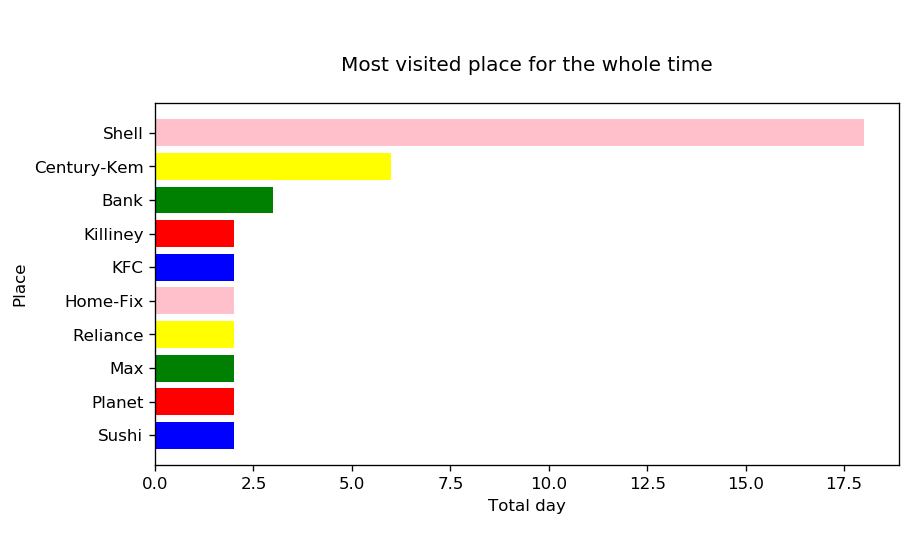

In [22]:
import matplotlib.pyplot as plt

df_top10 = df_top10.head(10)

label = df_top10['placename'].str.split(" ", n = 1, expand = True)

df_top10 = df_top10.head(10).sort_values(by='totalday', ascending=True)
x = np.arange(len(df_top10))
y = df_top10['totalday'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=120, figsize=(8,4))
plt.barh(x, y, color=colors)
plt.title('\n\nMost visited place for the whole time\n')
plt.yticks(x,label[0])
plt.ylabel('Place')
plt.xlabel('Total day\n')

plt.show()

<br>
#### Filtering top ten visited places data based on weekday only


In [5]:
df_weekday = pd.DataFrame()
df_top10_weekend = pd.DataFrame()

df_weekday = df[(df['day'] != 'Saturday') & (df['day'] != 'Sunday')]

df_weekday = df_weekday[(df_weekday['placename'] == 'Shell') | (df_weekday['placename'] == 'Century-Kem Chicks Kemang') | (df_weekday['placename'] == 'Bank Rakyat Indonesia Syariah @ Jalan S Parman') | (df_weekday['placename'] == 'Sushi King') | (df_weekday['placename'] == 'Planet 1 Degree The Gardens Mall') | (df_weekday['placename'] == 'Max Life Insurance @ Swatantrya Veer Savarkar Marg') | (df_weekday['placename'] == 'Reliance General Insurance @ Krishna Colony 1st Road') | (df_weekday['placename'] == 'Home-Fix') | (df_weekday['placename'] == 'KFC') | (df_weekday['placename'] == 'Killiney Kopitiam')]

df_weekday = df_weekday.sort_values(by='placename', ascending=False).reset_index(drop=True) # data order by brandname

df_weekday

,timestamp,day,date,time,country,placeid,placename,brandname
0,1543367284,Wednesday,28/11/2018,01:08:04 AM,MYS,1030123,Sushi King,Sushi King
1,1538507291,Tuesday,2/10/2018,07:08:11 PM,MYS,1030037,Sushi King,Sushi King
2,1539663745,Tuesday,16/10/2018,04:22:25 AM,IDN,1056680,Shell,Shell
3,1540536792,Friday,26/10/2018,06:53:12 AM,IDN,1056680,Shell,Shell
4,1538390795,Monday,1/10/2018,10:46:35 AM,IDN,1056680,Shell,Shell
5,1538402476,Monday,1/10/2018,02:01:16 PM,IDN,1056680,Shell,Shell
6,1539785440,Wednesday,17/10/2018,02:10:40 PM,IDN,1056680,Shell,Shell
7,1539300307,Thursday,11/10/2018,11:25:07 PM,IDN,1056680,Shell,Shell
8,1538175650,Friday,28/9/2018,11:00:50 PM,IDN,1056680,Shell,Shell
9,1539667213,Tuesday,16/10/2018,05:20:13 AM,IDN,1056680,Shell,Shell


<br>
#### Total weekday from top ten most visited places with respect to place


In [6]:
df_top10_weekday= df_weekday.groupby('placename').count()[['day']].reset_index().sort_values(by='day', ascending=False)

df_top10_weekday= df_top10_weekday.rename(columns={'day': 'totalweekday'}).reset_index(drop=True)

df_top10_weekday.head(10)

,placename,totalweekday
0,Shell,8
1,Century-Kem Chicks Kemang,4
2,Home-Fix,2
3,Planet 1 Degree The Gardens Mall,2
4,Reliance General Insurance @ Krishna Colony 1s...,2
5,Sushi King,2
6,Bank Rakyat Indonesia Syariah @ Jalan S Parman,1
7,KFC,1
8,Killiney Kopitiam,1
9,Max Life Insurance @ Swatantrya Veer Savarkar ...,1


<br>
#### Filtering top ten visited places data based on weekend only


In [7]:
df_weekend1 = pd.DataFrame()
df_top10_weekend = pd.DataFrame()

df_weekend1 = df[(df['day'] == 'Saturday') | (df['day'] == 'Sunday')]

df_weekend1 = df_weekend1[(df_weekend1['placename'] == 'Shell') | (df_weekend1['placename'] == 'Century-Kem Chicks Kemang') | (df_weekend1['placename'] == 'Bank Rakyat Indonesia Syariah @ Jalan S Parman') | (df_weekend1['placename'] == 'Sushi King') | (df_weekend1['placename'] == 'Planet 1 Degree The Gardens Mall') | (df_weekend1['placename'] == 'Max Life Insurance @ Swatantrya Veer Savarkar Marg') | (df_weekend1['placename'] == 'Reliance General Insurance @ Krishna Colony 1st Road') | (df_weekend1['placename'] == 'Home-Fix') | (df_weekend1['placename'] == 'KFC') | (df_weekend1['placename'] == 'Killiney Kopitiam')]

df_weekend1 = df_weekend1.sort_values(by='placename', ascending=False).reset_index(drop=True) # data order by brandname

df_weekend1

,timestamp,day,date,time,country,placeid,placename,brandname
0,1538203126,Saturday,29/9/2018,06:38:46 AM,IDN,1056680,Shell,Shell
1,1540029482,Saturday,20/10/2018,09:58:02 AM,IDN,1056680,Shell,Shell
2,1539535168,Sunday,14/10/2018,04:39:28 PM,IDN,1056680,Shell,Shell
3,1538317668,Sunday,30/9/2018,02:27:48 PM,IDN,1056680,Shell,Shell
4,1538301833,Sunday,30/9/2018,10:03:53 AM,IDN,1056680,Shell,Shell
5,1538210105,Saturday,29/9/2018,08:35:05 AM,IDN,1056680,Shell,Shell
6,1538289112,Sunday,30/9/2018,06:31:52 AM,IDN,1056680,Shell,Shell
7,1540033471,Saturday,20/10/2018,11:04:31 AM,IDN,1056680,Shell,Shell
8,1539434400,Saturday,13/10/2018,12:40:00 PM,IDN,1056680,Shell,Shell
9,1542440291,Saturday,17/11/2018,07:38:11 AM,IDN,1056680,Shell,Shell


<br>
#### Total weekend from top ten most visited places with respect to place

<br>Only five places had visitor on the weekend

In [8]:
df_top10_weekend = df_weekend1.groupby('placename').count()[['day']].reset_index().sort_values(by='day', ascending=False)

df_top10_weekend = df_top10_weekend.rename(columns={'day': 'totalweekend'}).reset_index(drop=True)

df_top10_weekend

,placename,totalweekend
0,Shell,10
1,Bank Rakyat Indonesia Syariah @ Jalan S Parman,2
2,Century-Kem Chicks Kemang,2
3,KFC,1
4,Killiney Kopitiam,1
5,Max Life Insurance @ Swatantrya Veer Savarkar ...,1


<br>
#### Joining two table to gather columns total weekday and total weekend based on place

<br>Assigning 0 value to the <b>totalweekend</b> columns which the place that have no visitor on weekend


In [9]:
df_summary_top10 = pd.DataFrame()

df_summary_top10 = df_top10_weekday.merge(df_top10_weekend, how='outer')

df_summary_top10 = df_summary_top10.fillna(0) #replacing no values with '0.0'

df_summary_top10

,placename,totalweekday,totalweekend
0,Shell,8,10.0
1,Century-Kem Chicks Kemang,4,2.0
2,Home-Fix,2,0.0
3,Planet 1 Degree The Gardens Mall,2,0.0
4,Reliance General Insurance @ Krishna Colony 1s...,2,0.0
5,Sushi King,2,0.0
6,Bank Rakyat Indonesia Syariah @ Jalan S Parman,1,2.0
7,KFC,1,1.0
8,Killiney Kopitiam,1,1.0
9,Max Life Insurance @ Swatantrya Veer Savarkar ...,1,1.0


<br>
#### Graph comparison between weekday and weekend over top 10 most visited places

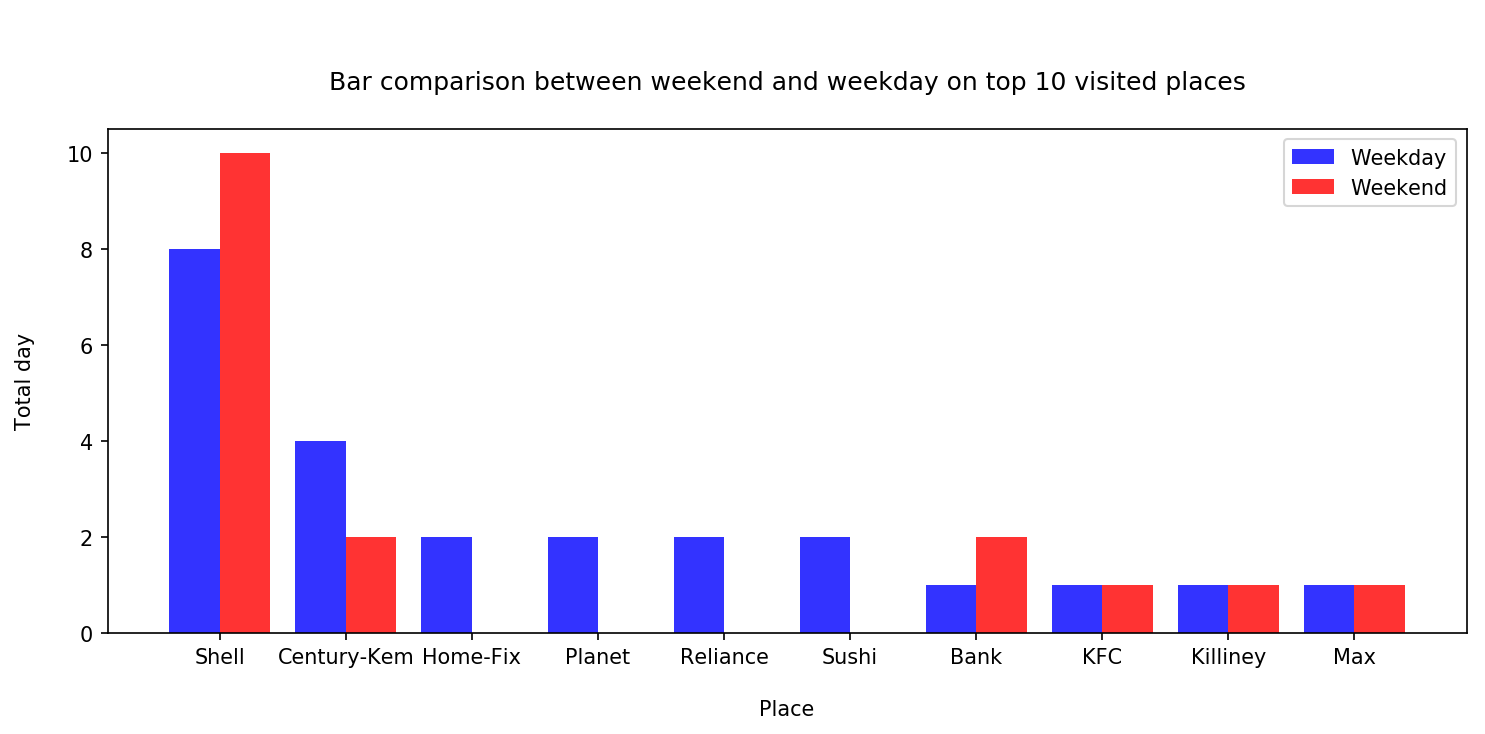

In [10]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

label = df_summary_top10['placename'].str.split(" ", n = 1, expand = True) 

n_groups = 10

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)

index = np.arange(n_groups)
bar_width = 0.4

opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, df_summary_top10['totalweekday'].values, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Weekday')

rects2 = ax.bar(index + bar_width, df_summary_top10['totalweekend'].values, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Weekend')

ax.set_xlabel('\nPlace')
ax.set_ylabel('Total day\n')
ax.set_title('\n\nBar comparison between weekend and weekday on top 10 visited places\n')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label[0])
ax.legend()

fig.tight_layout()
plt.show()

<br>
#### Filtering ALL data based on weekend only


In [11]:
df_weekend = df[(df['day'] == 'Saturday') | (df['day'] == 'Sunday')]

df_weekend.head(20)  #displaying only 20 sample

,timestamp,day,date,time,country,placeid,placename,brandname
79,1538183018,Saturday,29/9/2018,01:03:38 AM,IDN,2129142,Ayam Penyet Surabaya @ Jalan Gatot Subroto II,Ayam Penyet Surabaya
80,1540635183,Saturday,27/10/2018,10:13:03 AM,IDN,1038735,Pulung Barata PT,Barata
81,1538203126,Saturday,29/9/2018,06:38:46 AM,IDN,1056680,Shell,Shell
82,1538205730,Saturday,29/9/2018,07:22:10 AM,IDN,1041841,Century-Kem Chicks Kemang,Century
83,1541858312,Saturday,10/11/2018,01:58:32 PM,MYS,1004672,Tadika Bintang Suria,Bintang
84,1540658535,Saturday,27/10/2018,04:42:15 PM,IDN,2309318,Apotek Sekar Sari @ Jalan S. Parman,Apotek
85,1542440291,Saturday,17/11/2018,07:38:11 AM,IDN,1056680,Shell,Shell
86,1539434400,Saturday,13/10/2018,12:40:00 PM,IDN,1056680,Shell,Shell
87,1538235301,Saturday,29/9/2018,03:35:01 PM,MYS,1011856,Food Court City Plaza,Food Court
88,1540004471,Saturday,20/10/2018,03:01:11 AM,THA,100663049,Millennium Auto Group @ Sukhumvit 63,BMW


<br>
#### List of top five brands that were most visited in every weekend
<br>
<b>total_day</b> column represents the total visited weekend from a whole dataset respective to the <b>brandname</b>


In [12]:
df_totalday = pd.DataFrame()

df_totalday = df_weekend.groupby('brandname').count()[['day']].reset_index()

df_totalday['total_day'] = df_totalday['day']

df_totalday = df_totalday.drop(columns=['day'])

df_totalday = df_totalday.sort_values(by='total_day', ascending=False).reset_index(drop=True)

df_totalday.head(5)

,brandname,total_day
0,Shell,10
1,Apotek,6
2,Burger King,2
3,Indomaret,2
4,Pos Indonesia,2


<br>
#### List of average datetime on every weekend respective to the brand  



In [13]:
df_temp = pd.DataFrame() 

df_weekend['timestamp'] = pd.to_datetime(df_weekend['timestamp'], unit='s').values.astype(np.int64) #convert timestamp into seconds
df_temp = df_weekend.groupby('brandname', as_index=False)['timestamp'].mean()
df_temp['datetime'] = pd.to_datetime(df_temp['timestamp'], unit='ns')  #from timestamp conver datetime

df_temp = df_temp.drop(columns=['timestamp'])

df_temp.head(15)  # display only 15 sample


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,brandname,datetime
0,Daerah Kluang,2018-09-30 02:49:00.000
1,G17,2018-12-09 13:08:12.000
2,Jalan Tun Perak,2018-12-09 01:02:49.000
3,Lot PT 8960,2018-12-08 05:13:20.000
4,7-Eleven,2018-10-14 22:46:29.000
5,Apotek,2018-10-26 23:12:18.000
6,Apotek K-24,2018-11-24 10:27:18.000
7,Ashok Hotel,2018-09-30 09:04:11.000
8,Ayam Penyet Surabaya,2018-09-29 01:03:38.000
9,BMW,2018-10-20 03:01:11.000


<br>
#### Converting the average datetime (considered as popular hour of visited) into separated column as peak_hour and peak_day 

In [14]:
df_temp['peak_hour'] = df_temp['datetime'].dt.time
df_temp['peak_date'] = df_temp['datetime'].dt.date
df_temp = df_temp.drop(columns=['datetime'])
df_temp.sort_values(by='peak_hour', ascending=False).reset_index(drop=True)

df_temp.head(15)

,brandname,peak_hour,peak_date
0,Daerah Kluang,02:49:00,2018-09-30
1,G17,13:08:12,2018-12-09
2,Jalan Tun Perak,01:02:49,2018-12-09
3,Lot PT 8960,05:13:20,2018-12-08
4,7-Eleven,22:46:29,2018-10-14
5,Apotek,23:12:18,2018-10-26
6,Apotek K-24,10:27:18,2018-11-24
7,Ashok Hotel,09:04:11,2018-09-30
8,Ayam Penyet Surabaya,01:03:38,2018-09-29
9,BMW,03:01:11,2018-10-20


<br>
#### Join two table to combine columns total_day, peak_hour and peak_day based on brandname
<br>
Total brand found from dataset is <b>45</b>

In [15]:
df_summary = pd.DataFrame()

#df_summary = pd.concat([df_totalday, df_temp], axis=1, join='inner')
df_summary = df_totalday.merge(df_temp, how='left')

df_summary.head(10)  #displaying only 10 sample

,brandname,total_day,peak_hour,peak_date
0,Shell,10,17:37:45.600000,2018-10-11
1,Apotek,6,23:12:18,2018-10-26
2,Burger King,2,08:35:47.500000,2018-10-31
3,Indomaret,2,11:00:30,2018-09-30
4,Pos Indonesia,2,19:28:44,2018-11-07
5,Bank Rakyat,2,06:28:13.500000,2018-10-27
6,Bata,2,12:06:14,2018-10-20
7,Pertamina,2,12:13:11,2018-10-03
8,Century,2,18:08:07,2018-10-09
9,Daerah Kluang,1,02:49:00,2018-09-30


<br>
#### Selecting top five most visited brands on every weekend from the table

In [16]:
df_summary = df_summary.head(5)
df_summary

,brandname,total_day,peak_hour,peak_date
0,Shell,10,17:37:45.600000,2018-10-11
1,Apotek,6,23:12:18,2018-10-26
2,Burger King,2,08:35:47.500000,2018-10-31
3,Indomaret,2,11:00:30,2018-09-30
4,Pos Indonesia,2,19:28:44,2018-11-07


<br>
#### Displaying barchart for top five different brands against total weekend of visited

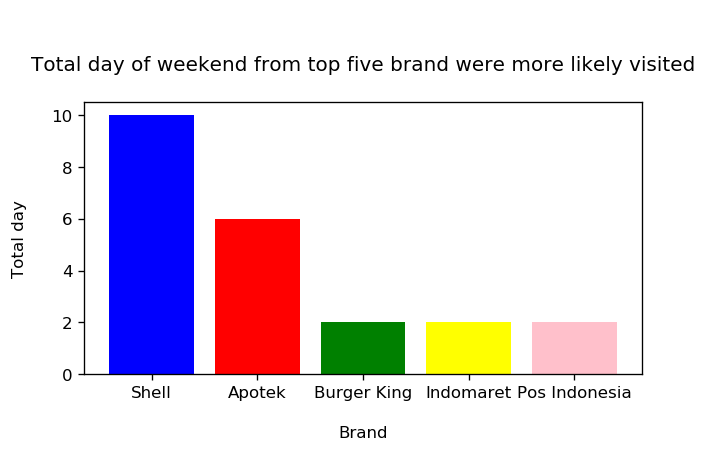

In [17]:
import matplotlib.pyplot as plt
import matplotlib

x = np.arange(len(df_summary))
y = df_summary['total_day'].values
label = df_summary['brandname'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=120, figsize=(6,3))
plt.bar(x, y, color=colors)
plt.title('\n\nTotal day of weekend from top five brand were more likely visited\n')
plt.xticks(x,label)
plt.xlabel('\nBrand')
plt.ylabel('Total day\n')

plt.show()

<br>
#### Plot comparison on peak hour over five different brands

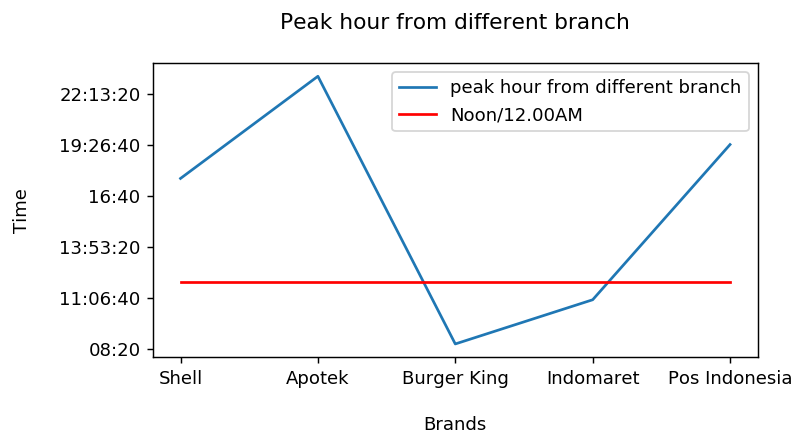

In [18]:
plt.figure(dpi=130, figsize=(6,3))

noon = []

for p in range(0,5):
    p = datetime.strptime('12:00:00', '%H:%M:%S').time()
    noon.append(p)

plt.plot(df_summary['peak_hour'].values, label="peak hour from different branch")
plt.plot(noon, c="red", label="Noon/12.00AM")
plt.title('Peak hour from different branch\n')
plt.ylabel('Time\n')
plt.xlabel('\nBrands')
plt.xticks(x,label)

plt.legend()
plt.show()